In [1]:
import pandas as pd
import seaborn as sns
# Assuming your file is a text file with tab-separated values
file_path = '/kaggle/input/discussion-group-message-whats-app/WhatsApp Chat with Discussion (4).txt'
df = pd.read_csv(file_path, sep='\t')

# Display the first few rows of the dataset to understand its structure
print(df.head())


  12/30/23, 22:05 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
0   12/30/23, 22:05 - You created group "Discussion"                                                                                                           
1  12/30/23, 22:06 - Pranesh Chowdhury: Hi, How a...                                                                                                           
2  12/30/23, 22:07 - Pranesh Chowdhury: I am tryi...                                                                                                           
3  12/30/23, 22:08 - Pranesh Chowdhury: Please me...                                                                                                           
4  12/30/23, 22:09 - Pranesh Chowdhury: Continue it.                                                                                                           


In [2]:
# Count the number of rows/messages in the dataset
message_count = len(df)
print(f'Total number of messages: {message_count}')

Total number of messages: 66


In [3]:
# Display the column names in the dataset
columns = df.columns
print(f'Columns in the dataset: {columns}')

Columns in the dataset: Index(['12/30/23, 22:05 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.'], dtype='object')


**How many messages were sent during different hours in the 24-hour period?**

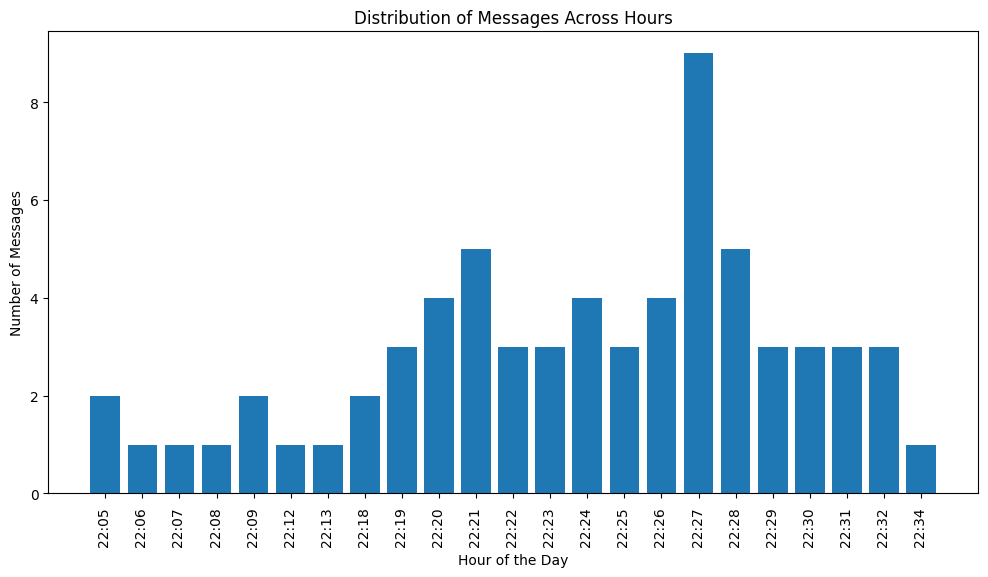

In [4]:
import re
from collections import Counter
import matplotlib.pyplot as plt
# Read the text file and extract timestamps
with open('/kaggle/input/discussion-group-message-whats-app/WhatsApp Chat with Discussion (4).txt', 'r') as file:
    timestamps = [re.search(r'\d{1,2}:\d{2}\s*[APMapm]{0,2}', line).group() for line in file if re.search(r'\d{1,2}:\d{2}\s*[APMapm]{0,2}', line)]

# Count the occurrences of each hour
hour_counts = Counter(timestamps)

# Plot the distribution of messages across different hours
plt.figure(figsize=(12, 6))
plt.bar(hour_counts.keys(), hour_counts.values())
plt.title('Distribution of Messages Across Hours')
plt.xlabel('Hour of the Day')
plt.xticks(rotation=90)
plt.ylabel('Number of Messages')
plt.show()


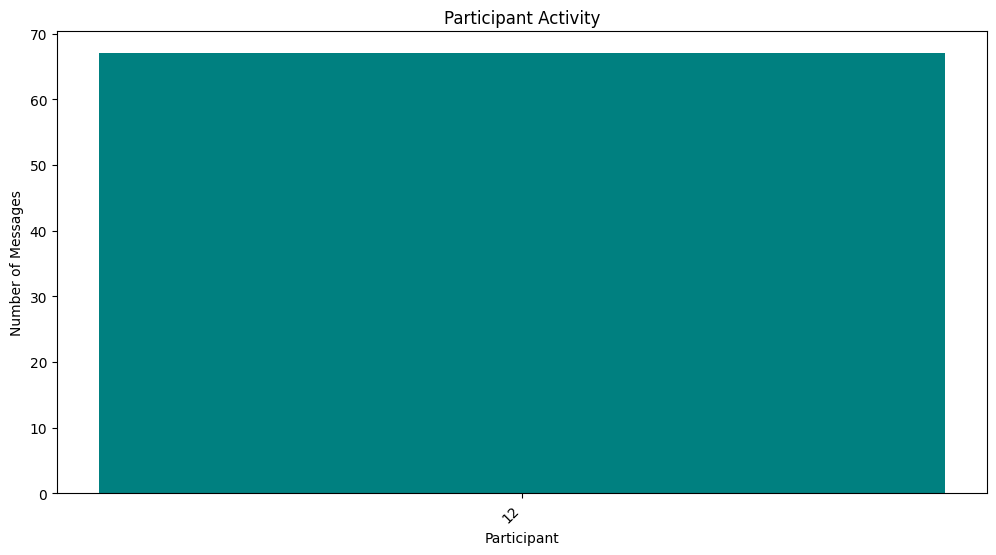

In [5]:
# Assuming participants' names are at the beginning of each message line
with open('/kaggle/input/discussion-group-message-whats-app/WhatsApp Chat with Discussion (4).txt', 'r') as file:
    participant_names = [re.match(r'^\w+', line).group() for line in file if re.match(r'^\w+', line)]

# Plot a bar chart to show the activity of each participant
participant_counts = Counter(participant_names)

plt.figure(figsize=(12, 6))
plt.bar(participant_counts.keys(), participant_counts.values(), color='teal')
plt.title('Participant Activity')
plt.xlabel('Participant')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45, ha='right')
plt.show()


In [6]:
# Read the text file and save its content to a variable
with open('/kaggle/input/discussion-group-message-whats-app/WhatsApp Chat with Discussion (4).txt', 'r') as file:
    chat_content = file.readlines()

# Display the first few lines of the text file to understand its structure
for line in chat_content[:10]:  # Displaying the first 10 lines for illustration
    print(line)

12/30/23, 22:05 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.

12/30/23, 22:05 - You created group "Discussion"

12/30/23, 22:06 - Pranesh Chowdhury: Hi, How are you?

12/30/23, 22:07 - Pranesh Chowdhury: I am trying to make a message dataset for our python project.

12/30/23, 22:08 - Pranesh Chowdhury: Please message in english. Because our analysis work on the English language.

12/30/23, 22:09 - Pranesh Chowdhury: Continue it.

12/30/23, 22:09 - Pranesh Chowdhury: ☺️

12/30/23, 22:12 - Pranesh Chowdhury: I am doing a python project. So I need your help to create this chats.

12/30/23, 22:13 - Pranesh Chowdhury: I want to analyze the exported chat files.

12/30/23, 22:18 - You added Ayaz EDU



**How does the length of messages vary?**

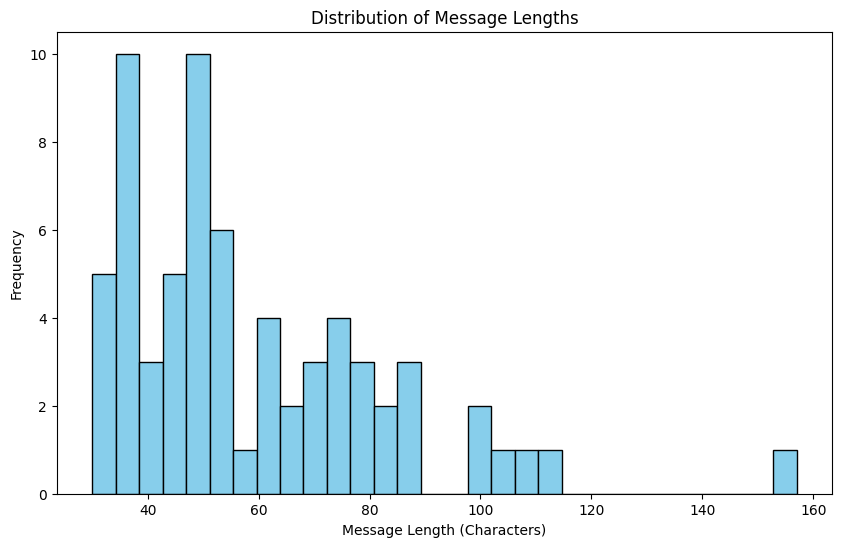

In [7]:
# Calculate the length of each message
message_lengths = [len(line.strip()) for line in chat_content]

# Plot a histogram to visualize the distribution of message lengths
plt.figure(figsize=(10, 6))
plt.hist(message_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length (Characters)')
plt.ylabel('Frequency')
plt.show()


**Who are the most active participants in the conversation**

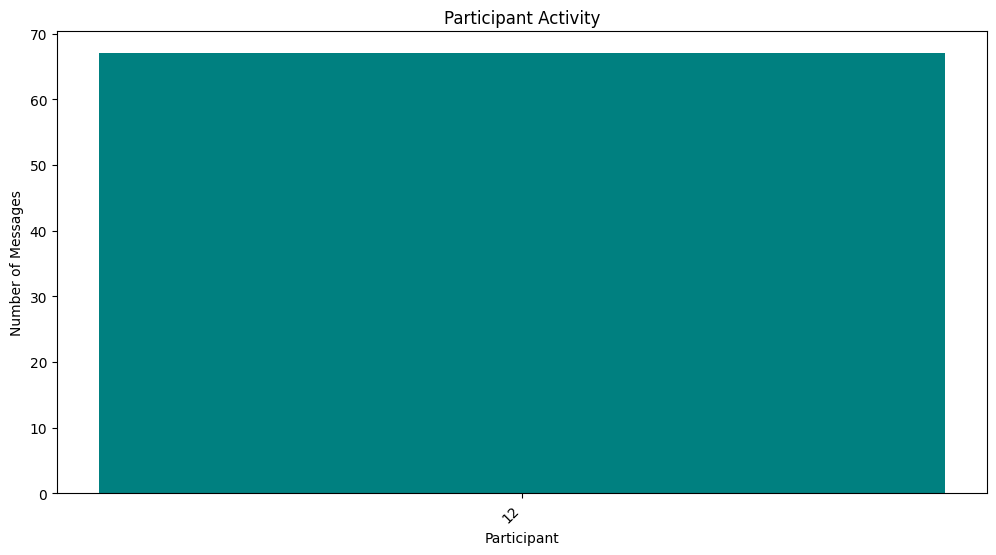

In [8]:
# Extract participant names from the beginning of each message line
participant_names = [re.match(r'^\w+', line).group() for line in chat_content if re.match(r'^\w+', line)]

# Plot a bar chart to show the activity of each participant
participant_counts = Counter(participant_names)

plt.figure(figsize=(12, 6))
plt.bar(participant_counts.keys(), participant_counts.values(), color='teal')
plt.title('Participant Activity')
plt.xlabel('Participant')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45, ha='right')
plt.show()


**What is the distribution of message lengths?**

Minimum message length: 30
Maximum message length: 157
Mean message length: 59.34


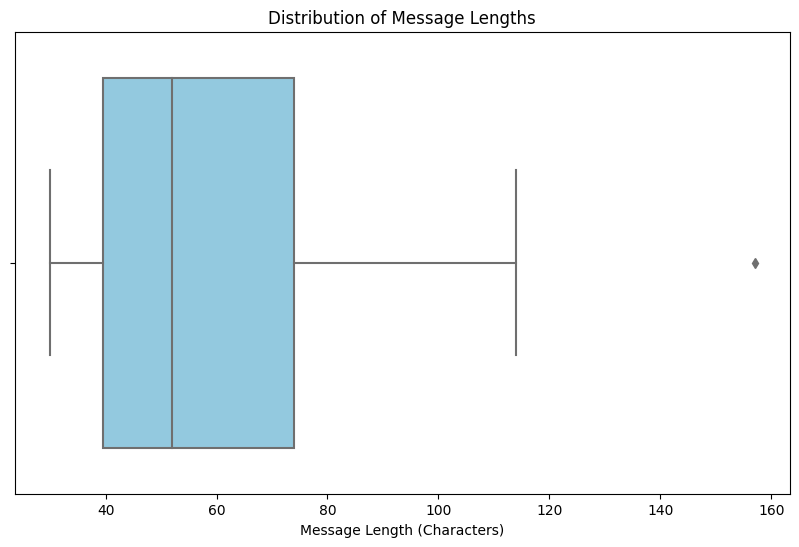

In [9]:
# Calculate the length of each message
message_lengths = [len(line.strip()) for line in chat_content]

# Display basic statistics and plot a boxplot
print(f'Minimum message length: {min(message_lengths)}')
print(f'Maximum message length: {max(message_lengths)}')
print(f'Mean message length: {sum(message_lengths) / len(message_lengths):.2f}')

plt.figure(figsize=(10, 6))
sns.boxplot(x=message_lengths, color='skyblue')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length (Characters)')
plt.show()


**What is the overall sentiment of the messages?**

Minimum sentiment polarity: -0.7
Maximum sentiment polarity: 0.8
Mean sentiment polarity: 0.10


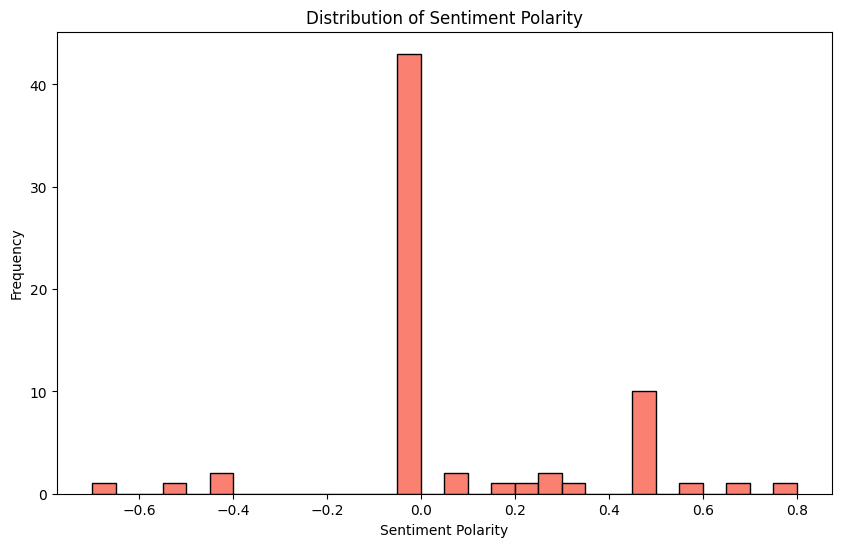

In [10]:
from textblob import TextBlob

# Calculate sentiment polarity for each message
sentiments = [TextBlob(line).sentiment.polarity for line in chat_content]

# Display basic statistics and plot a histogram
print(f'Minimum sentiment polarity: {min(sentiments)}')
print(f'Maximum sentiment polarity: {max(sentiments)}')
print(f'Mean sentiment polarity: {sum(sentiments) / len(sentiments):.2f}')

plt.figure(figsize=(10, 6))
plt.hist(sentiments, bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


**What are the most common words used?**

Most common words: [('12/30/23,', 67), ('-', 67), ('Pranesh', 35), ('Chowdhury:', 35), ('Ayaz', 30), ('EDU:', 29), ('I', 10), ('the', 10), ('22:27', 9), ('to', 8), ('is', 8), ('a', 6), ('for', 6), ('22:21', 5), ('you', 5), ('22:28', 5), ('are', 4), ('of', 4), ('am', 4), ('your', 4)]


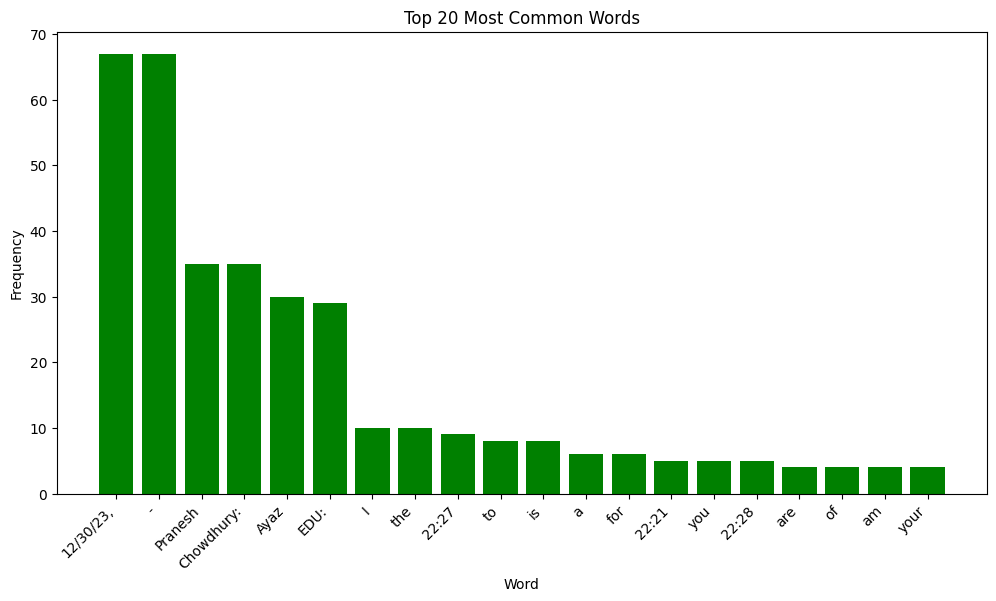

In [11]:
from collections import Counter

# Tokenize the text into words
words = ' '.join(chat_content).split()

# Count the occurrences of each word
word_counts = Counter(words)

# Display the most common words and plot a bar chart
most_common_words = word_counts.most_common(20)
print(f'Most common words: {most_common_words}')

plt.figure(figsize=(12, 6))
plt.bar([word[0] for word in most_common_words], [word[1] for word in most_common_words], color='green')
plt.title('Top 20 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


**What is the distribution of message lengths for each participant?**

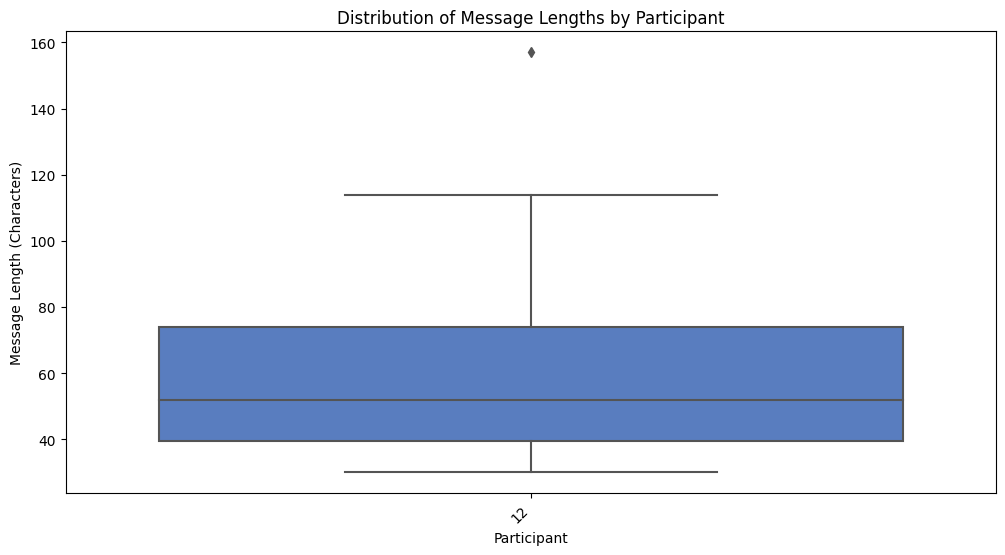

In [12]:
# Create a DataFrame with participant names and corresponding message lengths
df_lengths = pd.DataFrame({'Participant': participant_names, 'MessageLength': message_lengths})

# Plot a boxplot to visualize the distribution of message lengths for each participant
plt.figure(figsize=(12, 6))
sns.boxplot(x='Participant', y='MessageLength', data=df_lengths, palette='muted')
plt.title('Distribution of Message Lengths by Participant')
plt.xlabel('Participant')
plt.ylabel('Message Length (Characters)')
plt.xticks(rotation=45, ha='right')
plt.show()


**What is the distribution of messages across different hours of the day?**

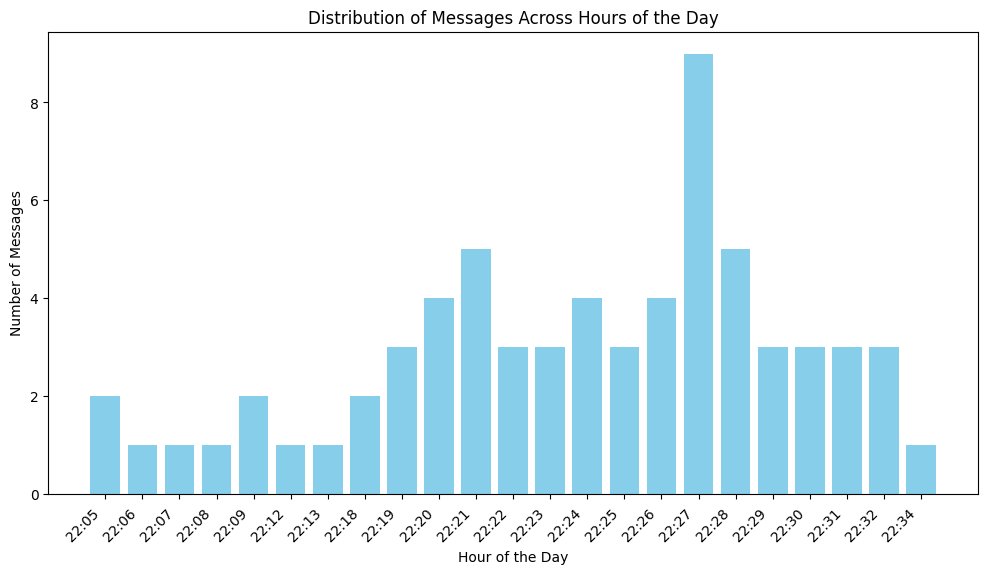

In [13]:
# Extract hour from timestamps
hours = [re.search(r'\d{1,2}:\d{2}\s*[APMapm]{0,2}', line).group() for line in chat_content]
hour_counts = Counter(hours)

# Plot a bar chart to show the distribution of messages across hours
plt.figure(figsize=(12, 6))
plt.bar(hour_counts.keys(), hour_counts.values(), color='skyblue')
plt.title('Distribution of Messages Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45, ha='right')
plt.show()


**What is the average word length used by each participant?**

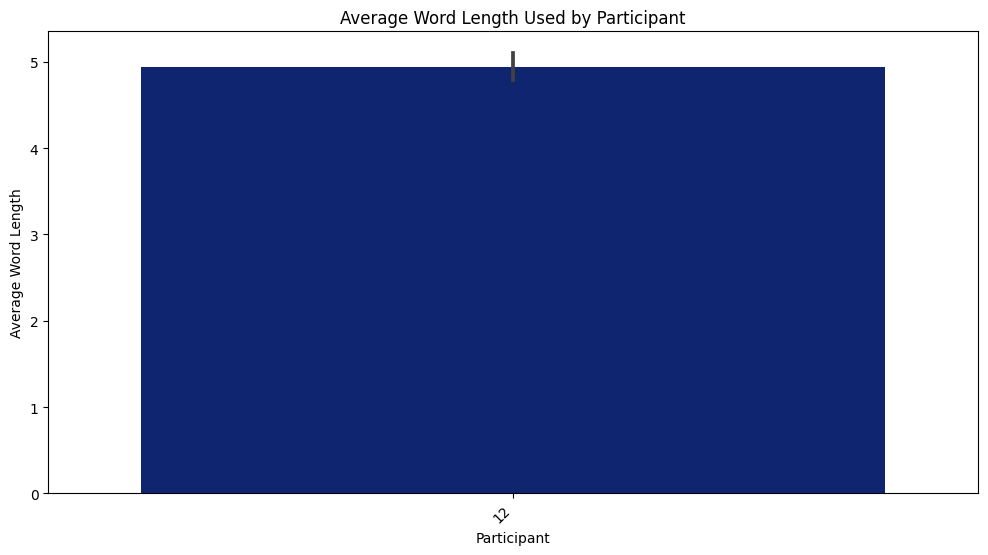

In [14]:
# Calculate the average word length for each message
average_word_lengths = [sum(len(word) for word in line.split()) / len(line.split()) for line in chat_content]

# Create a DataFrame with participant names and corresponding average word lengths
df_word_length = pd.DataFrame({'Participant': participant_names, 'AverageWordLength': average_word_lengths})

# Plot a bar chart to visualize the average word length used by each participant
plt.figure(figsize=(12, 6))
sns.barplot(x='Participant', y='AverageWordLength', data=df_word_length, palette='dark')
plt.title('Average Word Length Used by Participant')
plt.xlabel('Participant')
plt.ylabel('Average Word Length')
plt.xticks(rotation=45, ha='right')
plt.show()


**How does the sentiment polarity correlate with the length of messages?**

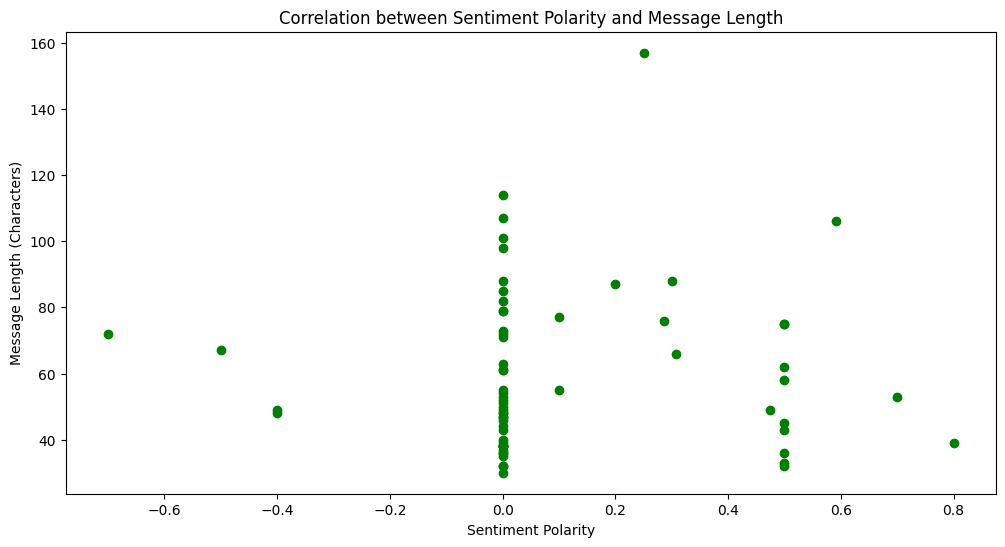

In [15]:
# Create a DataFrame with timestamps and corresponding sentiment polarities
df_sentiments = pd.DataFrame({'Timestamp': timestamps, 'SentimentPolarity': sentiments})
# Assuming df_sentiments DataFrame is already created with 'SentimentPolarity' and 'Timestamp' columns
# Add a new column for message length to df_sentiments
df_sentiments['MessageLength'] = [len(line.strip()) for line in chat_content]

# Plot a scatterplot to visualize the correlation between sentiment polarity and message length
plt.figure(figsize=(12, 6))
plt.scatter(df_sentiments['SentimentPolarity'], df_sentiments['MessageLength'], color='green')
plt.title('Correlation between Sentiment Polarity and Message Length')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Message Length (Characters)')
plt.show()


**Is there any relationship between the usage of uppercase letters and sentiment polarity?**

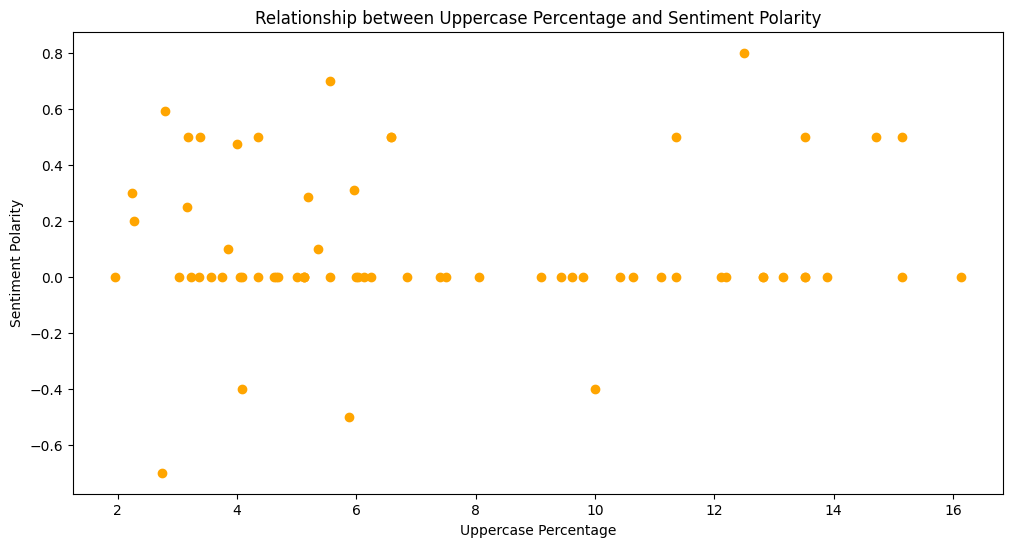

In [16]:
# Assuming df_sentiments DataFrame is already created with 'SentimentPolarity' and 'Timestamp' columns
# Add a new column for the percentage of uppercase letters to df_sentiments
df_sentiments['UppercasePercentage'] = [sum(c.isupper() for c in line) / len(line) * 100 for line in chat_content]

# Plot a scatterplot to visualize the relationship between uppercase percentage and sentiment polarity
plt.figure(figsize=(12, 6))
plt.scatter(df_sentiments['UppercasePercentage'], df_sentiments['SentimentPolarity'], color='orange')
plt.title('Relationship between Uppercase Percentage and Sentiment Polarity')
plt.xlabel('Uppercase Percentage')
plt.ylabel('Sentiment Polarity')
plt.show()


**How do the average word length and sentiment polarity relate?**

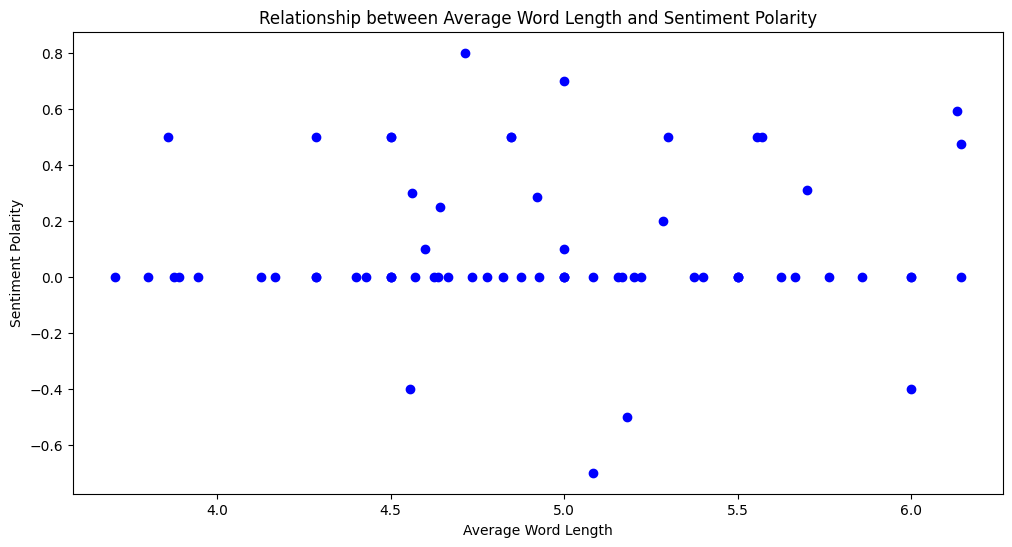

In [17]:
# Assuming df_sentiments DataFrame is already created with 'SentimentPolarity' and 'Timestamp' columns
# Add a new column for average word length to df_sentiments
df_sentiments['AverageWordLength'] = [sum(len(word) for word in line.split()) / len(line.split()) for line in chat_content]

# Plot a scatterplot to visualize the relationship between average word length and sentiment polarity
plt.figure(figsize=(12, 6))
plt.scatter(df_sentiments['AverageWordLength'], df_sentiments['SentimentPolarity'], color='blue')
plt.title('Relationship between Average Word Length and Sentiment Polarity')
plt.xlabel('Average Word Length')
plt.ylabel('Sentiment Polarity')
plt.show()


**Investigate the connection between message length and the usage of uppercase letters.**

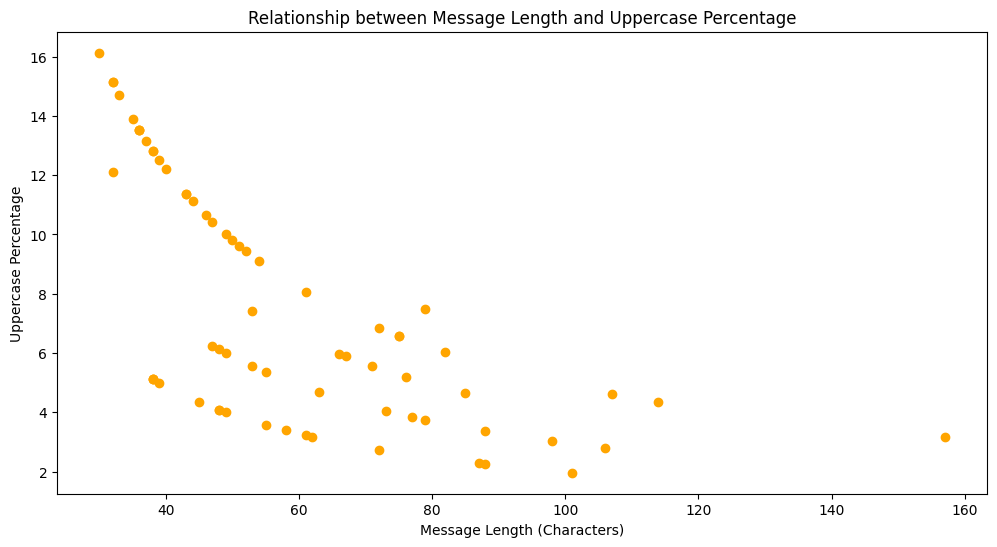

In [18]:
# Assuming df_sentiments DataFrame is already created with 'SentimentPolarity' and 'Timestamp' columns
# Add a new column for message length to df_sentiments
df_sentiments['MessageLength'] = [len(line.strip()) for line in chat_content]

# Add a new column for the percentage of uppercase letters to df_sentiments
df_sentiments['UppercasePercentage'] = [sum(c.isupper() for c in line) / len(line) * 100 for line in chat_content]

# Plot a scatterplot to visualize the relationship between message length and uppercase percentage
plt.figure(figsize=(12, 6))
plt.scatter(df_sentiments['MessageLength'], df_sentiments['UppercasePercentage'], color='orange')
plt.title('Relationship between Message Length and Uppercase Percentage')
plt.xlabel('Message Length (Characters)')
plt.ylabel('Uppercase Percentage')
plt.show()


**Investigate the relationship between the usage of uppercase letters and average word length.**

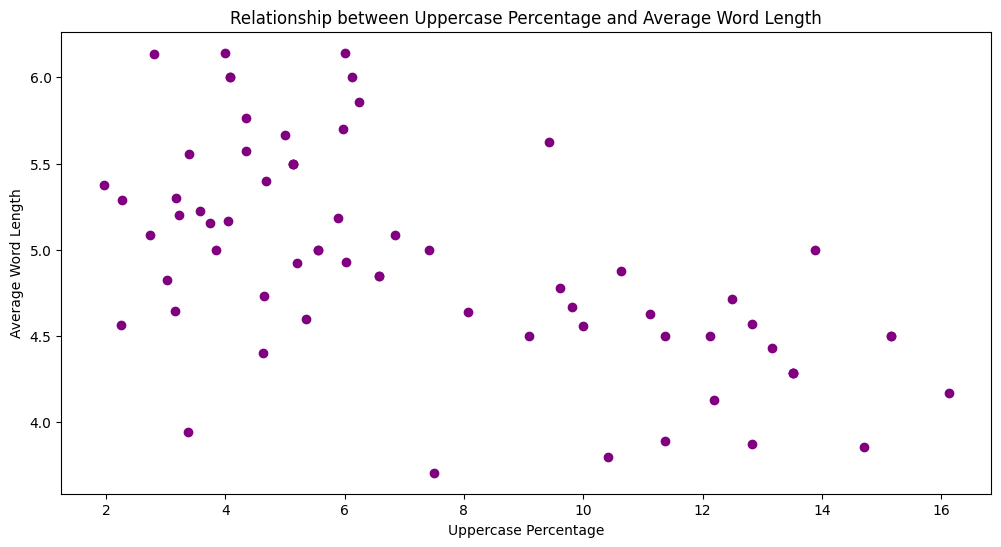

In [19]:
# Assuming df_sentiments DataFrame is already created with 'SentimentPolarity' and 'Timestamp' columns
# Add a new column for the percentage of uppercase letters to df_sentiments
df_sentiments['UppercasePercentage'] = [sum(c.isupper() for c in line) / len(line) * 100 for line in chat_content]

# Add a new column for average word length to df_sentiments
df_sentiments['AverageWordLength'] = [sum(len(word) for word in line.split()) / len(line.split()) for line in chat_content]

# Plot a scatterplot to visualize the relationship between uppercase percentage and average word length
plt.figure(figsize=(12, 6))
plt.scatter(df_sentiments['UppercasePercentage'], df_sentiments['AverageWordLength'], color='purple')
plt.title('Relationship between Uppercase Percentage and Average Word Length')
plt.xlabel('Uppercase Percentage')
plt.ylabel('Average Word Length')
plt.show()


**Explore the relationship between sentiment polarity and the average word length.**

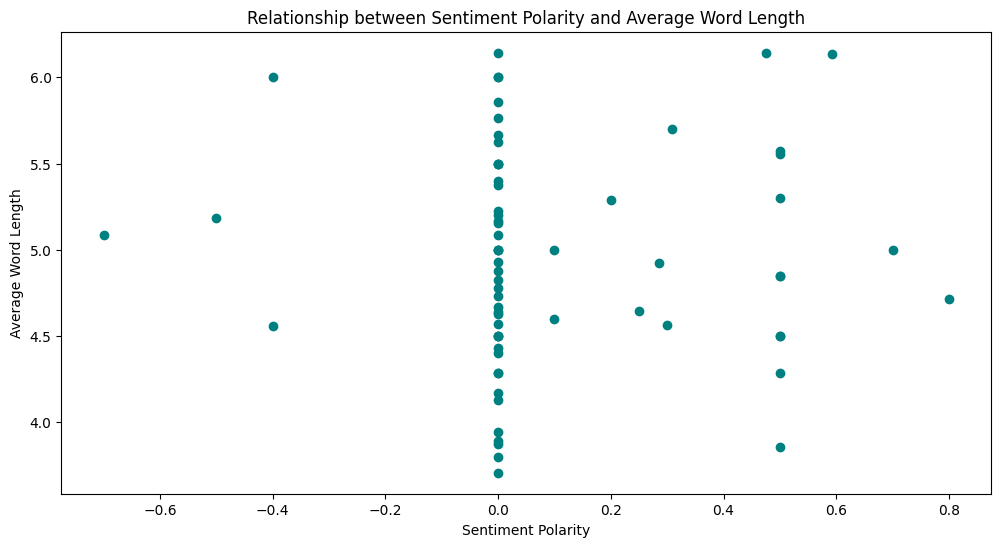

In [20]:
# Assuming df_sentiments DataFrame is already created with 'SentimentPolarity' and 'Timestamp' columns
# Add a new column for average word length to df_sentiments
df_sentiments['AverageWordLength'] = [sum(len(word) for word in line.split()) / len(line.split()) for line in chat_content]

# Plot a scatterplot to visualize the relationship between sentiment polarity and average word length
plt.figure(figsize=(12, 6))
plt.scatter(df_sentiments['SentimentPolarity'], df_sentiments['AverageWordLength'], color='teal')
plt.title('Relationship between Sentiment Polarity and Average Word Length')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Average Word Length')
plt.show()


**Explore the relationship between average word length and the usage of hashtags.**

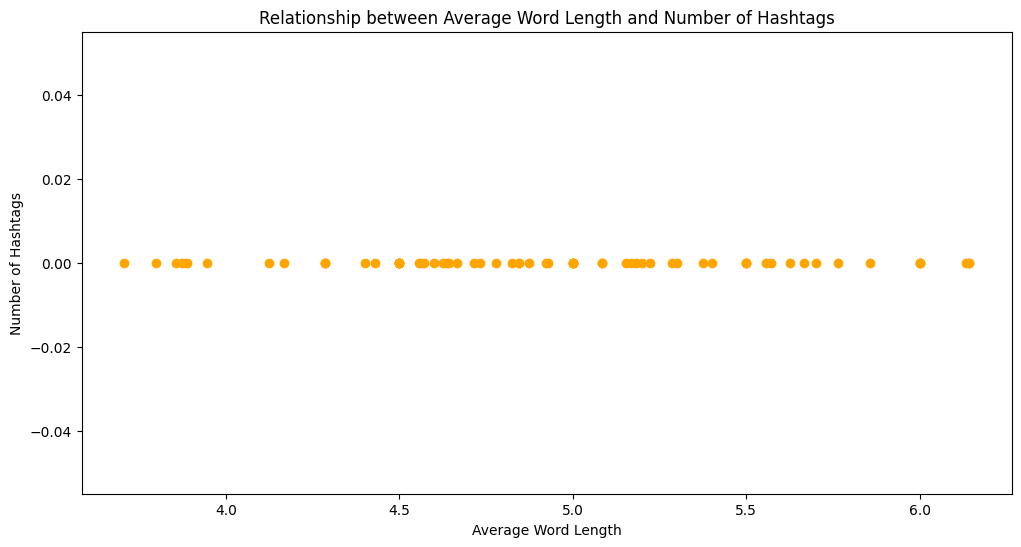

In [21]:
# Assuming df_sentiments DataFrame is already created with 'SentimentPolarity' and 'Timestamp' columns
# Add a new column for average word length to df_sentiments
df_sentiments['AverageWordLength'] = [sum(len(word) for word in line.split()) / len(line.split()) for line in chat_content]

# Assuming hashtags are present in the chat content
# Add a new column for the number of hashtags to df_sentiments
df_sentiments['NumHashtags'] = [len(re.findall(r'#\w+', line)) for line in chat_content]

# Plot a scatterplot to visualize the relationship between average word length and the number of hashtags
plt.figure(figsize=(12, 6))
plt.scatter(df_sentiments['AverageWordLength'], df_sentiments['NumHashtags'], color='orange')
plt.title('Relationship between Average Word Length and Number of Hashtags')
plt.xlabel('Average Word Length')
plt.ylabel('Number of Hashtags')
plt.show()
